Predicted Cholesterol Levels (Regression):
[202.41755207 217.61252625 232.8616538  225.28906982 211.98439977
 228.24780386 210.06594755 105.19400577 181.29229309 252.61051477
 165.15349945 213.49291136 138.65762165 196.43855113 237.30901976
 160.37997779 182.47373184 164.70626564 129.16661091 145.32209323
 223.28742451 231.93229    225.72217568 172.72912025 146.64797335
 263.3777362  232.44275467 246.5159625  215.5194753  218.26180209
 226.27129006 234.63726132 215.89666078 208.69559746 226.11323267
 133.79228571 221.76784245  86.61095673 145.60955757 188.31498331
 218.9098886  200.97954902 184.35684102 108.66684706 203.10684941
 207.03539918 257.57987486 222.56942709 165.18027777 168.02907599
 257.3444835  193.18739983 225.72892612 184.36514242 215.28788105
 214.24230846 235.71938949 209.6651929  115.95307335 235.74249008
 248.41896769 192.04318134 182.09838276 230.7982923  205.84831557
 250.18354655 201.84728375 201.30487146 164.2582614  249.5690511
 198.8681888  153.23262832 249.465

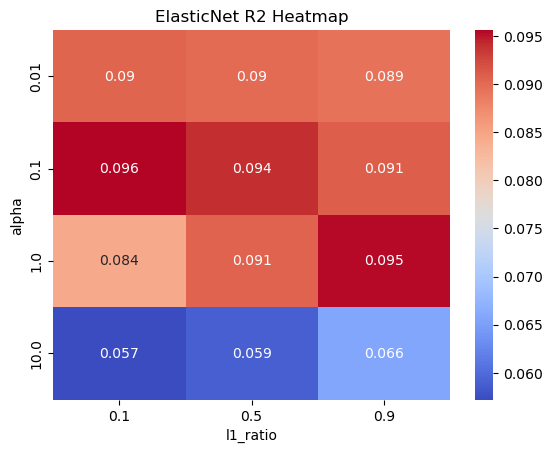

[[0.14117908 0.85882092]
 [0.79972076 0.20027924]
 [0.34533847 0.65466153]
 [0.30709138 0.69290862]
 [0.46263778 0.53736222]
 [0.73804886 0.26195114]
 [0.78576562 0.21423438]
 [0.06100099 0.93899901]
 [0.21889496 0.78110504]
 [0.59268224 0.40731776]
 [0.07522644 0.92477356]
 [0.91629084 0.08370916]
 [0.32030337 0.67969663]
 [0.03141884 0.96858116]
 [0.08340039 0.91659961]
 [0.61014311 0.38985689]
 [0.27192528 0.72807472]
 [0.39913654 0.60086346]
 [0.2218825  0.7781175 ]
 [0.65085554 0.34914446]
 [0.84348514 0.15651486]
 [0.73963118 0.26036882]
 [0.47882785 0.52117215]
 [0.58533263 0.41466737]
 [0.09191628 0.90808372]
 [0.21026401 0.78973599]
 [0.90946324 0.09053676]
 [0.8540502  0.1459498 ]
 [0.13946951 0.86053049]
 [0.09066667 0.90933333]
 [0.14952985 0.85047015]
 [0.03551363 0.96448637]
 [0.92673306 0.07326694]
 [0.10037126 0.89962874]
 [0.85119526 0.14880474]
 [0.14265116 0.85734884]
 [0.77626415 0.22373585]
 [0.07954713 0.92045287]
 [0.59231772 0.40768228]
 [0.14699033 0.85300967]


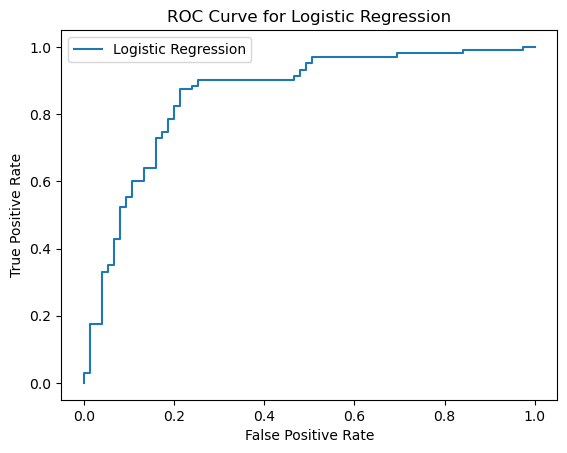

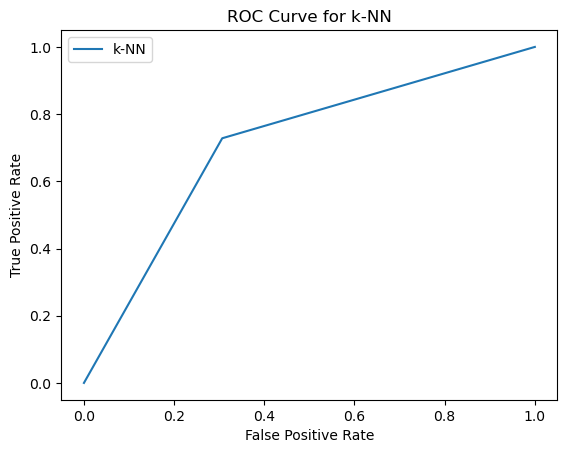

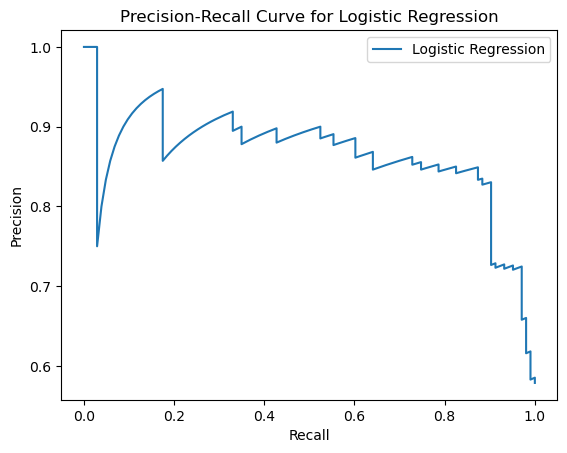

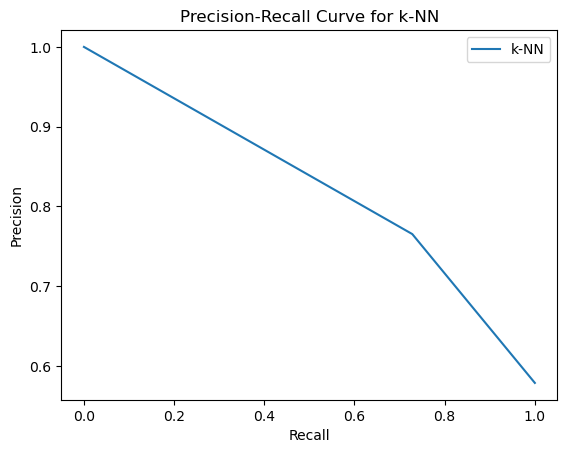

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import ElasticNet, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, roc_auc_score, average_precision_score, roc_curve, precision_recall_curve
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import label_binarize


# Load the dataset
df = pd.read_csv("/Users/binalpatel/Desktop/Machine learning/LAB2/Assignment-2/Data/heart_disease_uci(1).csv")

# Display first few rows
df.head()

# Convert data to numeric and handle missing values
df = df.apply(pd.to_numeric, errors='coerce')
df.dropna(axis=1, how='all', inplace=True)

# Encode categorical Variables
for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Regression: Predicting Cholesterol ('chol')
if 'chol' in df.columns:
    df = df.dropna(subset=['chol'])  # Ensure target variable has no NaN
    X_reg = df.drop(columns=['chol'])
    y_reg = df['chol']
    X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Apply imputation, handle missing values in regression features
imputer = SimpleImputer(strategy='mean')

# Fit & transform training data
X_train_reg = pd.DataFrame(imputer.fit_transform(X_train_reg), columns=X_reg.columns)

# Transform test data (Now the shapes will match)
X_test_reg = pd.DataFrame(imputer.transform(X_test_reg), columns=X_reg.columns)

y_train_reg = y_train_reg.reset_index(drop=True)
X_train_reg = X_train_reg.reset_index(drop=True)

# Train ElasticNet Regression
alphas = [0.01, 0.1, 1, 10]
l1_ratios = [0.1, 0.5, 0.9]
best_r2, best_rmse, best_model = -np.inf, np.inf, None
results = []

for alpha in alphas:
    for l1_ratio in l1_ratios:
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
        model.fit(X_train_reg, y_train_reg)
        y_pred = model.predict(X_test_reg)
        r2 = r2_score(y_test_reg, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred))
        results.append([alpha, l1_ratio, r2, rmse])
        if r2 > best_r2:
            best_r2, best_rmse, best_model = r2, rmse, model
            
# Print predictions for cholesterol levels
y_pred_chol = best_model.predict(X_test_reg)
print("Predicted Cholesterol Levels (Regression):")
print(y_pred_chol)


# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['alpha', 'l1_ratio', 'R2', 'RMSE'])
pivot_table = results_df.pivot(index='alpha', columns='l1_ratio', values='R2')
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.title('ElasticNet R2 Heatmap')
plt.show()

df['num'] = (df['num'] > 0).astype(int)  # Convert to binary (0 = No Disease, 1 = Disease)


# Classification: (Predicting 'num')
if 'num' in df.columns:
    X_clf = df.drop(columns=['num'])
    y_clf = df['num']
    X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

    # Apply imputation, handle missing values in classification features
    imputer_clf = SimpleImputer(strategy='mean')
    X_train_clf = pd.DataFrame(imputer_clf.fit_transform(X_train_clf), columns=X_clf.columns)
    X_test_clf = pd.DataFrame(imputer_clf.transform(X_test_clf), columns=X_clf.columns)
    

    # Standardize features
    scaler = StandardScaler()
    X_train_clf = scaler.fit_transform(X_train_clf)
    X_test_clf = scaler.transform(X_test_clf)

    # Train logistic Regression
    log_reg = LogisticRegression(max_iter=10000, solver='liblinear', penalty='l1', class_weight='balanced')
    log_reg.fit(X_train_clf, y_train_clf)
    y_pred_log = log_reg.predict(X_test_clf)
    print(log_reg.predict_proba(X_test_clf))

    # Print predictions for heart disease presence
    print("Predicted Presence of Heart Disease (Classification):")
    print(y_pred_log)

    # Train k-NN with different n_neighbors
    best_knn = None
    best_knn_score = 0
    for k in [1, 5, 10]:
        knn = KNeighborsClassifier(n_neighbors=k)  # Define KNN classifier
        knn.fit(X_train_clf, y_train_clf)
        score = knn.score(X_train_clf, y_train_clf)
        if score > best_knn_score:
            best_knn_score, best_knn = score, knn

    # Predictions for best kNN
    y_pred_knn = best_knn.predict(X_test_clf)

    
    # Evaluate models
metrics = {
    'LogisticRegression': {
        'Accuracy': accuracy_score(y_test_clf, y_pred_log),
        'F1 Score': f1_score(y_test_clf, y_pred_log, average='macro'),  # Adjusted for multiclass
        'AUROC': roc_auc_score(y_test_clf, log_reg.predict_proba(X_test_clf)[:, 1]),
        'AUPRC': average_precision_score(y_test_clf, log_reg.predict_proba(X_test_clf)[:, 1])
    },
    'k-NN': {
        'Accuracy': accuracy_score(y_test_clf, y_pred_knn),
        'F1 Score': f1_score(y_test_clf, y_pred_knn, average='macro'),  # Adjusted for multiclass
        'AUROC': roc_auc_score(y_test_clf, best_knn.predict_proba(X_test_clf)[:, 1]),
        'AUPRC': average_precision_score(y_test_clf, best_knn.predict_proba(X_test_clf)[:, 1])
    }
}


print(metrics)


# Binarize the labels for binary classification (required for ROC curve)
y_test_binarized = label_binarize(y_test_clf, classes=[0, 1])


# Logistic Regression AUROC
fpr_log, tpr_log, _ = roc_curve(y_test_clf, log_reg.predict_proba(X_test_clf)[:, 1])
plt.plot(fpr_log, tpr_log, label='Logistic Regression')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.legend()
plt.show()

# Similarly for k-NN AUROC
fpr_knn, tpr_knn, _ = roc_curve(y_test_clf, best_knn.predict_proba(X_test_clf)[:, 1])
plt.plot(fpr_knn, tpr_knn, label='k-NN')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for k-NN")
plt.legend()
plt.show()

# Plot Precision-Recall Curve for Logistic Regression
precision_log, recall_log, _ = precision_recall_curve(y_test_clf, log_reg.predict_proba(X_test_clf)[:, 1])
plt.plot(recall_log, precision_log, label='Logistic Regression')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Logistic Regression")
plt.legend()
plt.show()

# Similarly for k-NN Precision-Recall Curve
precision_knn, recall_knn, _ = precision_recall_curve(y_test_clf, best_knn.predict_proba(X_test_clf)[:, 1])
plt.plot(recall_knn, precision_knn, label='k-NN')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for k-NN")
plt.legend()
plt.show()


